In [1]:
from sklearn.linear_model import LinearRegression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns

c:\users\sanjoy\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
d=pd.read_csv(r"C:\Users\sanjoy\Downloads\dia.csv")
sppp=pd.read_csv(r"C:\Users\sanjoy\Downloads\car_sales.csv")
self=pd.read_csv(r"C:\Users\sanjoy\Downloads\salary_data.csv")
sl=pd.read_csv(r"C:\Users\sanjoy\Downloads\car.csv",encoding='ISO-8859-1')

In [4]:
d.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [5]:
d.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [6]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [7]:
d[cols_to_norm]=d[cols_to_norm].apply(lambda x: (x - x.min())/(x.max()-x.min()))

In [8]:
d.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [9]:
d.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [10]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [11]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

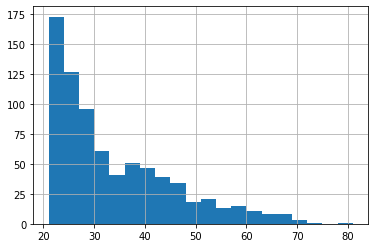

In [12]:
d['Age'].hist(bins=20)

In [13]:
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [14]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,age_bucket]

In [15]:
x_data = d.drop('Class', axis=1) 
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [16]:
labels = d['Class']
labels.head()

0    1
1    0
2    1
3    0
4    1
Name: Class, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test = train_test_split(x_data, labels, test_size=0.3, random_state=101)

In [19]:
X_train.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
711,0.294118,0.633166,0.639344,0.272727,0.026005,0.441133,0.154142,40,D
58,0.000000,0.733668,0.672131,0.000000,0.000000,0.603577,0.727156,44,D
216,0.294118,0.547739,0.508197,0.414141,0.152482,0.533532,0.186166,25,B
168,0.235294,0.552764,0.540984,0.000000,0.000000,0.475410,0.167805,29,B
658,0.647059,0.638191,0.868852,0.000000,0.000000,0.581222,0.047822,51,A


In [20]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train, batch_size=10,num_epochs=1000,shuffle=True)

In [21]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\sanjoy\\AppData\\Local\\Temp\\tmphsw4o8bt', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000026D1FEF3BC8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [22]:
model.train(input_fn=input_func, steps=1000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\sanjoy\App

In [23]:
#Eval the model
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,
                                                      shuffle=False)

In [24]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-08-08T11:48:34Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\sanjoy\AppData\Local\Temp\tmphsw4o8bt\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-08-08-11:48:35
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7316017, accuracy_baseline = 0.64935064, auc = 0.7993416, auc_precision_recall = 0.65272284, average_loss = 0.5253835, global_step = 1000, label/mean = 0.35064936, loss = 5.0568156, precision = 0.6557377, prediction/mean = 0.3468318, recall = 0.49382716
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\sanjoy\AppData\Local\Temp\tmphsw4o8bt\model.ckpt-1000


In [25]:
results

{'accuracy': 0.7316017,
 'accuracy_baseline': 0.64935064,
 'auc': 0.7993416,
 'auc_precision_recall': 0.65272284,
 'average_loss': 0.5253835,
 'label/mean': 0.35064936,
 'loss': 5.0568156,
 'precision': 0.6557377,
 'prediction/mean': 0.3468318,
 'recall': 0.49382716,
 'global_step': 1000}

In [26]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,num_epochs=1,shuffle=False)

In [27]:
predictions = model.predict(pred_input_func)

In [28]:
my_pred = list(predictions)
my_pred

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\sanjoy\AppData\Local\Temp\tmphsw4o8bt\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([-0.06595123], dtype=float32),
  'logistic': array([0.48351818], dtype=float32),
  'probabilities': array([0.5164818 , 0.48351815], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([0.490422], dtype=float32),
  'logistic': array([0.6202058], dtype=float32),
  'probabilities': array([0.37979418, 0.6202059 ], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([-0.5938192], dtype=float32),
  'logistic': array([0.35575902], dtype=float32),
  'probabilities': array([0.644241  , 0.35575905], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},


In [29]:
dnn_model=tf.estimator.DNNClassifier(hidden_units=[10,10,10], feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\sanjoy\\AppData\\Local\\Temp\\tmphnnv_bns', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000026D240C1F48>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [37]:
dnn_model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\sanjoy\AppData\Local\Temp\tmp7f63qkoj\model.ckpt-1000
Instructions for updating:
Use standard file utilities to get mtimes.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1000 into C:\Users\sanjoy\AppData\Local\Temp\tmp7f63qkoj\model.ckpt.
INFO:tensorflow:loss = 3.495861, step = 1001
INFO:tensorflow:global_step/sec: 239.895
INFO:tensorflow:loss = 4.1099987, step = 1101 (0.418 sec)
INFO:tensorflow:global_step/sec: 264.554
INFO:tensorflow:loss = 3.792297, step = 1201 (0.381 sec)
INFO:tensorflow:global_step/sec: 300.206
INFO:tensorflow:loss = 4.698138, step = 1301 (0.330 sec)
INFO:tensorflow:global_step/sec: 306.629
INFO:tensorflow:loss = 5.917086, step = 1401 (0.326 sec)
INFO:tensorflow:global_step/sec: 298.413
I

In [38]:
#embedded_group_col=tf.feature.embedding_column(assigned_group,dimension=4)

In [39]:
input_func=tf.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [40]:
dnn_model=tf.estimator.DNNClassifier(hidden_units=[10,10,10], feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\sanjoy\\AppData\\Local\\Temp\\tmpnpyag618', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000026D249B4688>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [41]:
dnn_model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\sanjoy\AppData\Local\Temp\tmpnpyag618\model.ckpt.
INFO:tensorflow:loss = 7.4812202, step = 1
INFO:tensorflow:global_step/sec: 195.071
INFO:tensorflow:loss = 6.7211776, step = 101 (0.524 sec)
INFO:tensorflow:global_step/sec: 231.031
INFO:tensorflow:loss = 3.7800632, step = 201 (0.424 sec)
INFO:tensorflow:global_step/sec: 263.862
INFO:tensorflow:loss = 5.192272, step = 301 (0.379 sec)
INFO:tensorflow:global_step/sec: 271.723
INFO:tensorflow:loss = 2.218994, step = 401 (0.367 sec)
INFO:tensorflow:global_step/sec: 304.769
INFO:tensorflow:loss = 7.729141, step = 501 (0.329 sec)
INFO:tensorflow:global_step/sec: 304.763
INFO:tensorflow:loss = 4.169769, step = 601 (0.328 sec)
INFO:tensorflow:global_step/sec

In [42]:
eval_input_func=tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1000,shuffle=False)

In [43]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-08-08T11:52:28Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\sanjoy\AppData\Local\Temp\tmpnpyag618\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-08-08-11:53:39
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7619048, accuracy_baseline = 0.64935064, auc = 0.8360905, auc_precision_recall = 0.71778023, average_loss = 0.47778484, global_step = 1000, label/mean = 0.35064936, loss = 4.7778482, precision = 0.6805556, prediction/mean = 0.34272355, recall = 0.60493827
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\sanjoy\AppData\Local\Temp\tmpnpyag618\model.ckpt-1000


{'accuracy': 0.7619048,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8360905,
 'auc_precision_recall': 0.71778023,
 'average_loss': 0.47778484,
 'label/mean': 0.35064936,
 'loss': 4.7778482,
 'precision': 0.6805556,
 'prediction/mean': 0.34272355,
 'recall': 0.60493827,
 'global_step': 1000}